In [34]:
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import pandas as pd
import quantstats as qs
import talib as ta

In [35]:
df = yf.download("BTC-USD")

[*********************100%***********************]  1 of 1 completed


In [36]:
df.tail(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-23,30309.396484,30590.585938,28975.560547,29098.910156,29098.910156,31483454557
2022-05-24,29101.125000,29774.355469,28786.589844,29655.585938,29655.585938,26616506245
2022-05-25,29653.134766,30157.785156,29384.949219,29562.361328,29562.361328,27525063551
2022-05-26,29564.777344,29834.160156,28261.906250,29267.224609,29267.224609,36774325352
2022-05-27,29251.140625,29346.943359,28326.613281,28627.574219,28627.574219,36582005748
2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,28814.900391,35519577634
2022-05-29,29019.867188,29498.009766,28841.107422,29445.957031,29445.957031,18093886409
2022-05-30,29443.365234,31949.630859,29303.572266,31726.390625,31726.390625,39277993274
2022-05-31,31723.865234,32249.863281,31286.154297,31792.310547,31792.310547,33538210634


In [37]:
# Count nulls
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [38]:
# Calculate VWAP
df['VWAP'] = (df.Volume*(df.Close)).cumsum() / df.Volume.cumsum()

In [39]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,VWAP
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,457.334015
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,436.911062
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,419.823580
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,416.734836
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,413.700159


In [40]:
# Drop coulmns
df.drop(columns=["Adj Close", "Volume"])

,Open,High,Low,Close,VWAP
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015
2014-09-18,456.859985,456.859985,413.104004,424.440002,436.911062
2014-09-19,424.102997,427.834991,384.532013,394.795990,419.823580
2014-09-20,394.673004,423.295990,389.882996,408.903992,416.734836
2014-09-21,408.084991,412.425995,393.181000,398.821014,413.700159
...,...,...,...,...,...
2022-06-02,29794.890625,30604.734375,29652.705078,30467.488281,28014.655415
2022-06-03,30467.806641,30633.035156,29375.689453,29704.390625,28015.684187
2022-06-04,29706.138672,29930.564453,29500.005859,29832.914062,28016.385079


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2820 entries, 2014-09-17 to 2022-06-06
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2820 non-null   float64
 1   High       2820 non-null   float64
 2   Low        2820 non-null   float64
 3   Close      2820 non-null   float64
 4   Adj Close  2820 non-null   float64
 5   Volume     2820 non-null   int64  
 6   VWAP       2820 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 176.2 KB


In [42]:
# Convert to datetime index
df.index = pd.to_datetime(df.index)

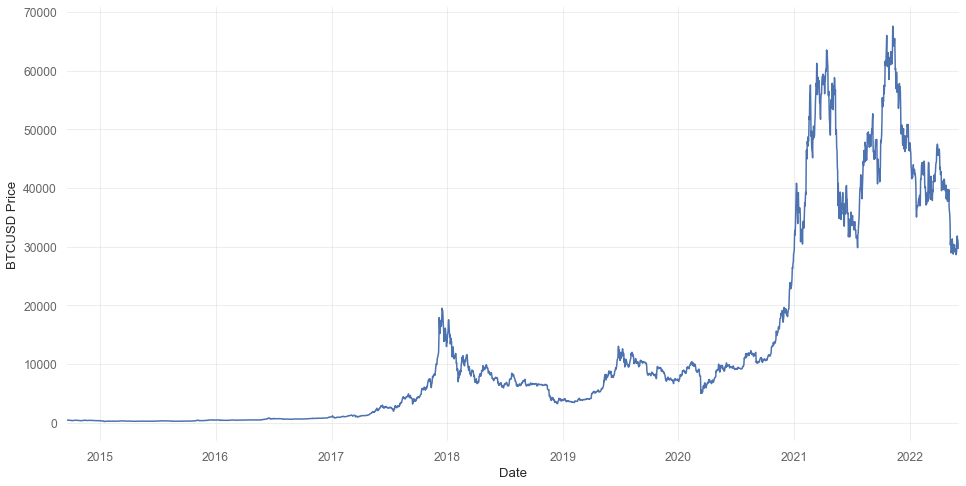

In [43]:
df.Close.plot(figsize=(16, 8))
plt.ylabel("BTCUSD Price")
plt.show()

<!-- # Ichimoku Cloud
The ichimoku cloud is a technical indicator that consists of five plots and a cloud. It can assist in displaying support, esistance, momentum, and trend in a single view. 
We adjusted the parameters for cryptocurrency pairs to 20, 60, 120, 30 because the crypto market is open 24/7 and more volatile than other assets.-->

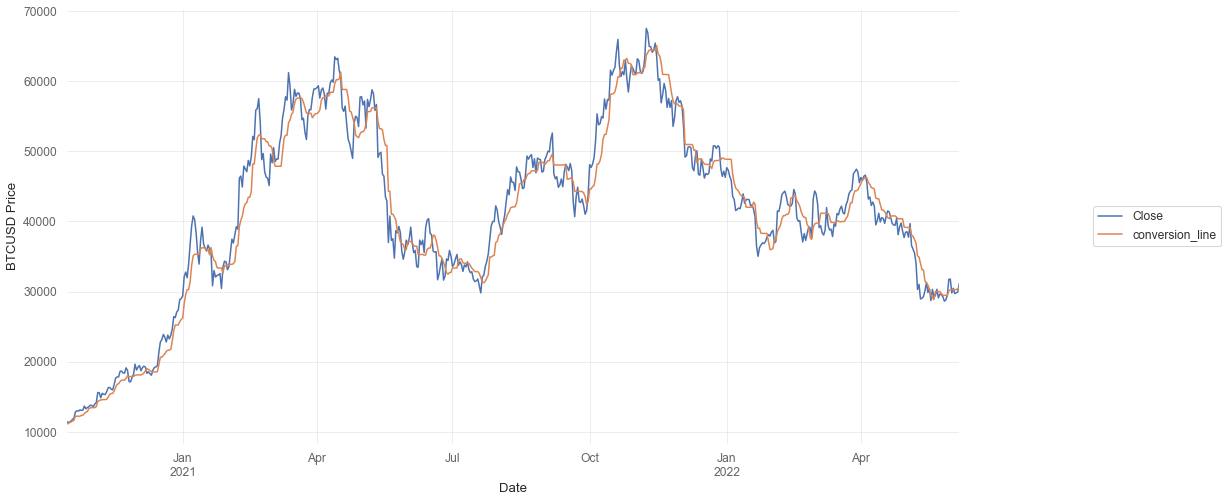

In [44]:
# Tenkansen (Conversion Line)
high_9 = df.High.rolling(9).max()
low_9 = df.Low.rolling(9).min()
df["conversion_line"] = (high_9 + low_9) / 2
conversion_line = df[["Close", "conversion_line"]]
conversion_line[-600:].plot(figsize=(16, 8))
plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5))
plt.ylabel("BTCUSD Price")
plt.show()

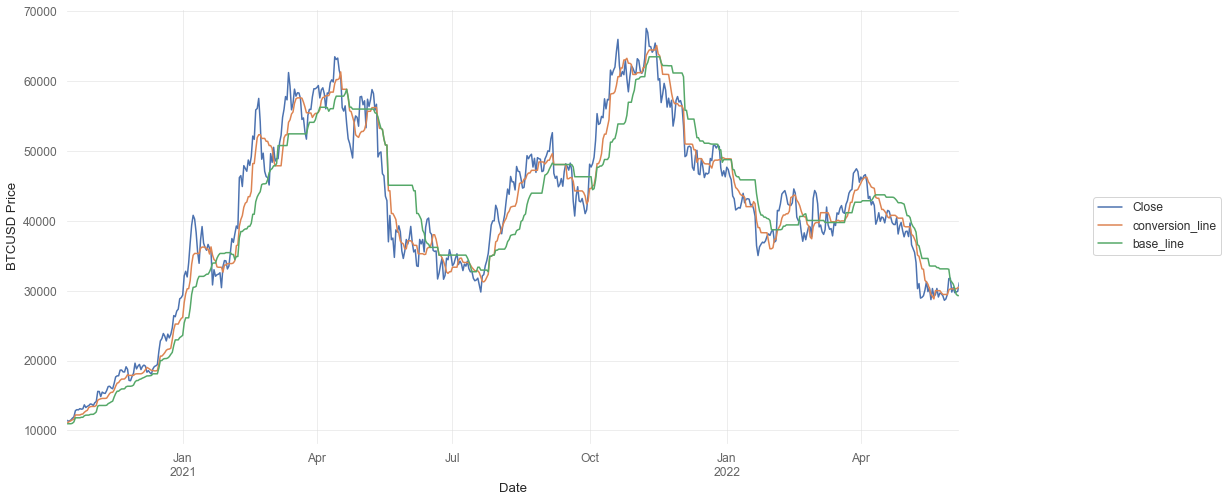

In [45]:
# Kijun-sen (Base Line)
high_26 = df.High.rolling(26).max()
low_26 = df.Low.rolling(26).min()
df["base_line"] = (high_26 + low_26) / 2

base_line = df[["Close", "conversion_line", "base_line"]]
base_line[-600:].plot(figsize=(16, 8))
plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5))
plt.ylabel("BTCUSD Price")
plt.show()

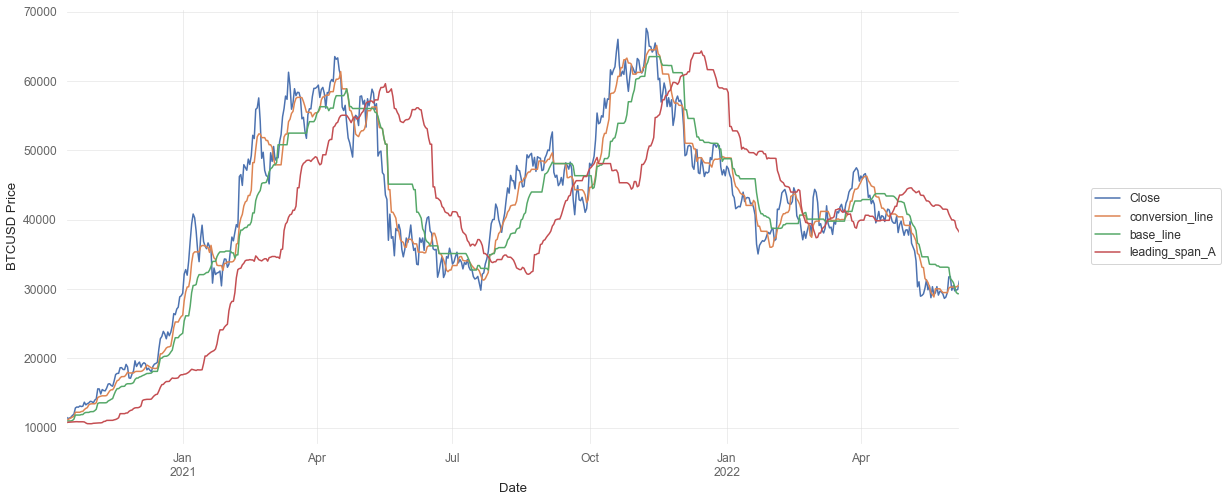

In [46]:
# Senkou Span A (Leading Span A)
df["leading_span_A"] = ((df.conversion_line + df.base_line) / 2).shift(30)

leading_span_A = df[["Close", "conversion_line",
                     "base_line", "leading_span_A"]]

leading_span_A[-600:].plot(figsize=(16, 8))
plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5))
plt.ylabel("BTCUSD Price")
plt.show()

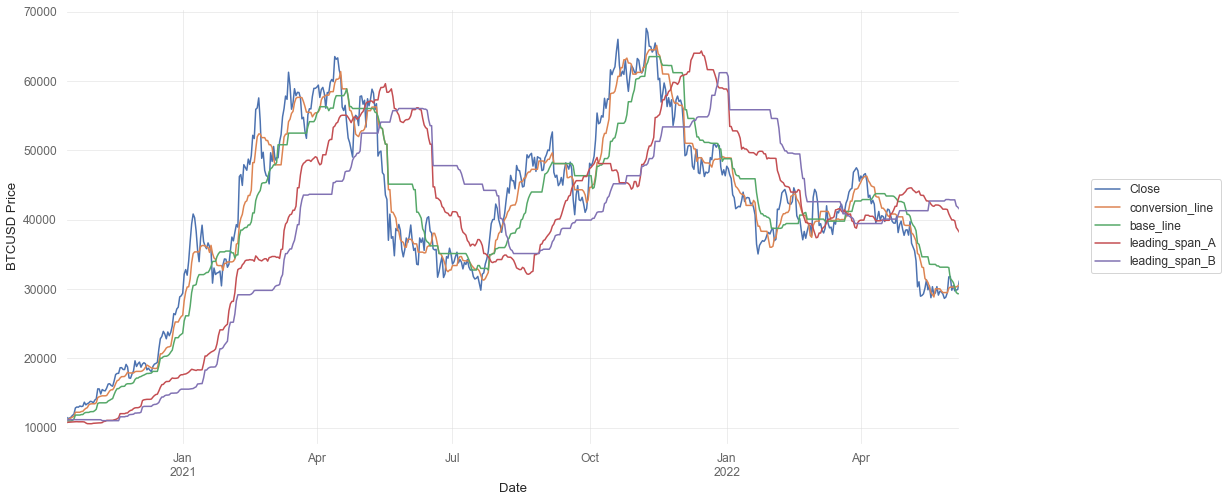

In [47]:
# Senkou Span B (Leading Span B)
high_52 = df.High.rolling(52).max()
low_52 = df.Low.rolling(52).min()
df["leading_span_B"] = ((high_52 + low_52) / 2).shift(30)

leading_span_B = df[["Close", "conversion_line",
                     "base_line", "leading_span_A", "leading_span_B"]]
leading_span_B[-600:].plot(figsize=(16, 8))
plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5))
plt.ylabel("BTCUSD Price")
plt.show()

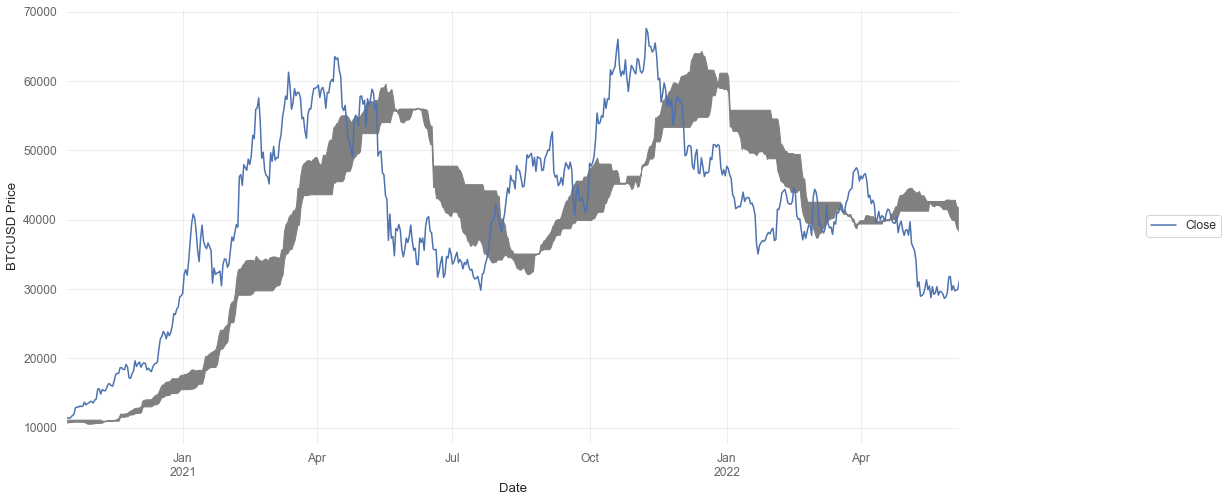

In [48]:
# Ichimoku Cloud
cloud = df[-600:].Close.plot(figsize=(16, 8))
cloud.fill_between(
    df[-600:].index, df[-600:].leading_span_A, df[-600:].leading_span_B, color="grey")
plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5))
plt.ylabel("BTCUSD Price")
plt.show()

In [49]:
# ADX settings
df['ADX'] = ta.ADX(df.High,df.Low,df.Close,14)
df["plus_DI"] = ta.PLUS_DI(df.High,df.Low,df.Close,14)
df["minus_DI"] = ta.MINUS_DI(df.High,df.Low,df.Close,14)

In [50]:
# Entry 
df["signal"] = np.nan

# Prices are above the cloud
condition_1 = (df.Close > df.leading_span_A) & (df.Close > df.leading_span_B)

# leading Span A (senkou_span_A) is gtreater than leading span B (senkou_span_B)
condition_2 = (df.leading_span_A > df.leading_span_B)

# Conversion Line (tenkan_sen) moves above Base Line (kijun_sen)
condition_3 = (df.conversion_line > df.base_line)

# ADX trending
condition_4 = (df.ADX > 30) & (df.plus_DI > df.minus_DI) 

# Combine the conditions and store in the signal column 1 when all the conditions are true
df.loc[condition_1 & condition_2 & condition_3 & condition_4, "signal"] = 1

In [58]:
# Exit 
# Prices are below the cloud
condition_1 = (df.Close < df.leading_span_A) & (df.Close < df.leading_span_B)

# leading Span A (senkou_span_A) is less than the leading span B (senkou_span_B)
condition_2 = (df.leading_span_A < df.leading_span_B)

# Conversion Line (tenkan_sen) moves below Base Line (kijun_sen)
condition_3 = (df.conversion_line < df.base_line)

# Combine the conditions and store in the signal column 0 when all the conditions are true
df.loc[condition_1 & condition_2 & condition_3, "signal"] = 0

df.signal.fillna(method="ffill", inplace=True)

df.iloc[280:310, :]

,Open,High,Low,Close,Adj Close,Volume,VWAP,conversion_line,base_line,leading_span_A,leading_span_B,ADX,plus_DI,minus_DI,signal
Date,,,,,,,,,,,,,,,
2015-06-24,244.281998,244.341003,240.514999,240.514999,240.514999,17344900,288.090301,246.487495,239.074501,236.647999,238.335999,27.982145,29.689661,18.008508,0.0
2015-06-25,240.365005,243.332001,240.365005,242.798996,242.798996,16133100,287.986473,248.609001,239.074501,237.542999,238.335999,27.689063,28.369998,17.432762,0.0
2015-06-26,242.604004,243.748993,241.552994,243.593994,243.593994,13983500,287.898440,246.236504,239.074501,237.542999,238.335999,27.495620,28.049002,16.836271,0.0
2015-06-27,243.548996,251.339005,243.117004,250.990005,250.990005,20488600,287.791511,245.852005,239.636002,237.549248,235.339493,28.500383,35.840295,14.795075,0.0
2015-06-28,250.955002,251.171997,247.434006,249.011002,249.011002,15137600,287.708678,245.852005,239.752495,238.047501,234.360497,29.433376,33.832068,13.966067,0.0
2015-06-29,248.720993,257.173004,248.580994,257.063995,257.063995,34742900,287.559182,248.769005,239.912498,237.600250,231.338997,31.003152,38.218580,12.264902,1.0
2015-06-30,257.036011,267.867004,255.945999,263.071991,263.071991,44533800,287.407012,254.116005,245.259499,236.974251,231.338997,33.308957,46.146666,10.376384,1.0
2015-07-01,263.345001,265.171997,255.774002,258.621002,258.621002,27029800,287.298847,254.116005,245.259499,233.093502,231.338997,35.400901,40.811514,9.388328,1.0
2015-07-02,258.552002,261.631012,254.115997,255.412003,255.412003,21551900,287.203597,254.116005,245.259499,232.854252,231.338997,36.856541,37.116216,10.535923,1.0


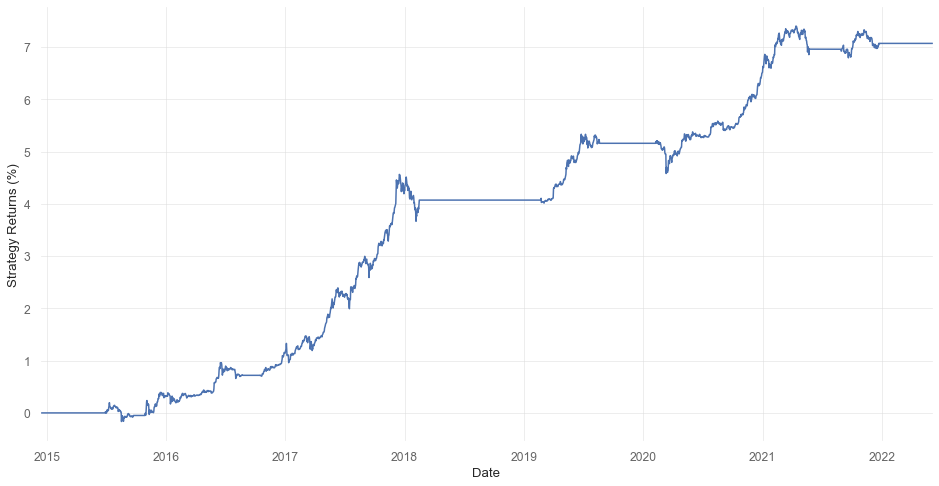

In [59]:
# Calculate daily returns
daily_returns = df.Close.pct_change()

# Calculate strategy returns 
strategy_returns = daily_returns * df.signal.shift(1)
strategy_returns.dropna(inplace=True)

# Plot strategy returns
strategy_returns.cumsum().plot(figsize=(16, 8))
plt.xlabel("Date")
plt.ylabel("Strategy Returns (%)")
plt.show()

In [60]:
# Check Sharpe ratio calculation 
def annualized_sharpe_ratio(returns, N=252):
    return ((N) * returns.mean()) / (returns.std() * np.sqrt(N))

# Sharpe ratio  
excess_daily_strategy_return = strategy_returns 
sharpe = annualized_sharpe_ratio(excess_daily_strategy_return)
print("The Sharpe ratio of strategy is %.2f" % sharpe)

The Sharpe ratio of strategy is 1.27


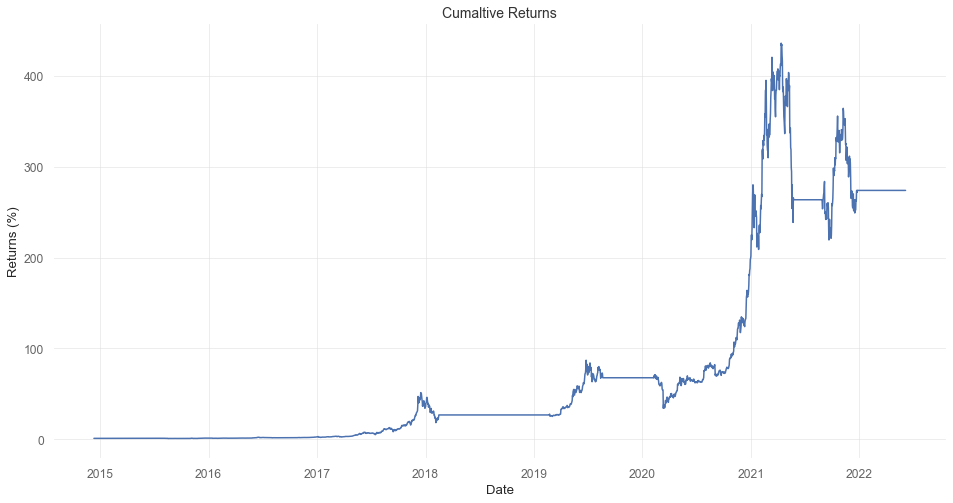

In [61]:
# Calculate the cumulative returns
df['cumulative_returns'] = (strategy_returns+1).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(16, 8))
plt.plot(df['cumulative_returns'])
plt.title('Cumaltive Returns', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.show()

In [62]:
# strategy_returns.value_counts()

Maximum drawdown of the strategy is -64.33%


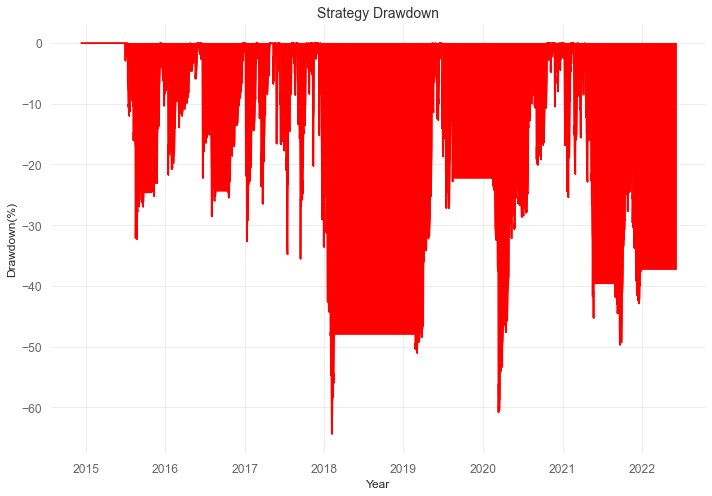

In [63]:
# Calculate the running maximum
running_max = np.maximum.accumulate(df['cumulative_returns'].dropna())
# Ensure the value never drops below 1
running_max[running_max < 1] = 1
# Calculate the percentage drawdown
drawdown = ((df['cumulative_returns'])/running_max - 1) * 100

# Calculate the maximum drawdown
print("Maximum drawdown of the strategy is {0:.2f}%".format(drawdown.min()))

fig = plt.figure(figsize=(10, 7))

# Plot max drawdown
plt.plot(drawdown, color='red')
# Fill in-between the drawdown
plt.fill_between(drawdown.index, drawdown.values, color='red')
plt.title('Strategy Drawdown', fontsize=14)
plt.ylabel('Drawdown(%)', fontsize=12)
plt.xlabel('Year', fontsize=12)

plt.tight_layout()
plt.show()

In [66]:
qs.reports.html(strategy_returns, "BTC-USD", output="BTC-USD.html")
# qs.reports.html(strategy_returns)